In [ ]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-mwfn2xl8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-mwfn2xl8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=02916e4fea65f854bfd491f16996a34f0da760b94366558f96ab8acbc419a668
  Stored in directory: /tmp/pip-ephem-wheel-cache-4dr_fi_z/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
%pip install llama_index
%pip install -U openai-whisper

In [ ]:
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 47.9 MB/s eta 0:00:00


In [ ]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

  if event.key is 'enter':



In [ ]:
pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.3 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata
api1= 'sk-proj--brK_ujplAYg5rzNwHXGstDKYEP7affHjc-xDqW88DhdAKSkzlr8QdRbw1pVPQ0VwZON8vZ3qAT3BlbkFJJYjj1rGdN4EqUg4Gck84yjYxTRk-9hIs0opLlKqCqZAH5-gDeOiqwiafp2Ite5FZUiqNPoh7'
api2= 'sk-proj-FdEI8w0xBQifMnUoAKacESEpslloFNVaneWp_UNNpZBGI0hHQ1S1CFrucdDKGr59cPmcAY5rO4T3BlbkFJAVSVyKFKOIY_5htxpw2GmRwu0DGHLxCcmr0palyKVONLbvFziV095B7Ah5vHM1i0L6Dif8rh'
OPENAI_API_TOKEN = api2
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
video_url = "https://youtu.be/j9oU6J61sw8?si=1YcwMU2ysP9RWo8t"

In [ ]:
output_video_path = "/content/video_data/"

In [ ]:
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [ ]:
!mkdir mixed_data

In [ ]:
filepath = output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


In [ ]:
import yt_dlp
import os

def download_video_with_yt_dlp(url, output_path):
    ydl_opts = {
        'outtmpl': os.path.join(output_path, 'input_vid.mp4'),  # Path for the downloaded video
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            result = ydl.extract_info(url, download=True)
            metadata = {
                "Author": result.get('uploader', 'N/A'),
                "Title": result.get('title', 'N/A'),
                "Views": result.get('view_count', 'N/A'),
            }
        return metadata
    except Exception as e:
        print(f"Error with yt-dlp: {e}")
        return None

In [ ]:
from moviepy.editor import VideoClip
def video_to_images(video_path,output_folder):
  clip = VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [ ]:
def video_to_audio(video_path,output_audio_path):
  clip = VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [ ]:
def audio_to_text(audio_path):
  recognizer = sr.Recognizer()
  audio = sr.AudioFile(audio_path)

  with audio as source:
    audio_data = recognizer.record(source)

    try:
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand audio")

    return text

In [ ]:
video_url

'https://youtu.be/j9oU6J61sw8?si=1YcwMU2ysP9RWo8t'

In [ ]:
output_video_path = "/content/video_data/"
os.makedirs(output_video_path, exist_ok=True)

In [ ]:
video_url = "https://youtu.be/j9oU6J61sw8?si=1YcwMU2ysP9RWo8t"

In [ ]:
metadata_vid_yt_dlp = download_video_with_yt_dlp(video_url, output_video_path)

# Check if metadata is available
if metadata_vid_yt_dlp:
    print("Video Metadata from yt-dlp:")
    for key, value in metadata_vid_yt_dlp.items():
        print(f"{key}: {value}")
else:
    print("Failed to fetch metadata with yt-dlp.")

[youtube] Extracting URL: https://youtu.be/j9oU6J61sw8?si=1YcwMU2ysP9RWo8t
[youtube] j9oU6J61sw8: Downloading webpage
[youtube] j9oU6J61sw8: Downloading ios player API JSON
[youtube] j9oU6J61sw8: Downloading mweb player API JSON
[youtube] j9oU6J61sw8: Downloading m3u8 information
[info] j9oU6J61sw8: Downloading 1 format(s): 137+251
[download] Destination: /content/video_data/input_vid.mp4.f137.mp4
[download] 100% of    5.96MiB in 00:00:00 at 14.57MiB/s  
[download] Destination: /content/video_data/input_vid.mp4.f251.webm
[download] 100% of    1.21MiB in 00:00:00 at 9.59MiB/s   
[Merger] Merging formats into "/content/video_data/input_vid.mp4.mkv"
Deleting original file /content/video_data/input_vid.mp4.f137.mp4 (pass -k to keep)
Deleting original file /content/video_data/input_vid.mp4.f251.webm (pass -k to keep)
Video Metadata from yt-dlp:
Author: Accounting in a Minute
Title: Tangible Assets | 1 Min Explanation | Examples
Views: 1


In [ ]:
os.rename('/content/video_data/input_vid.mp4.mkv', '/content/video_data/input_vid.mp4')


In [ ]:
video_to_images('/content/video_data/input_vid.mp4', output_folder)


Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [ ]:
video_to_audio(filepath, output_audio_path)


MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [ ]:
text_data = audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 104MiB/s]


In [ ]:
text_data

' 1 minute revision of the topic, tangible assets What is the meaning of tangible? The term tangible means something that can be felt by the sense of touch. Essets which have a physical existence and can be touched and felt are called tangible assets. Example, computers, vehicles, cash and more. Key highlights of tangible assets, such assets are visible and may be short term or long term in nature. They have a risk of destruction from natural incidents, accidents, therefore they may be in short. Tangible assets may easily be stored and used as collateral. Some common examples of tangible assets are plant and machinery, land and building, vehicles, inventory, furniture, laptop and PCs, cash, equipment and more.'

In [ ]:
with open(output_folder + 'output_data.txt', 'w') as file:
    file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [ ]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore


In [ ]:
text_store = LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store = LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [ ]:
storage_context = StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
documents = SimpleDirectoryReader(output_folder).load_data()

In [ ]:
 index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 110MiB/s]


In [ ]:
retriever_engine = index.as_retriever(similarity_top_k=1,image_similarity_top_k=3)

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [ ]:
def retrieve(retriever_engine,query_str):
  retriever_results = retriever_engine.retrieve(query_str)

  retrieved_image = []
  retrieved_text = []
  for res_node in retriever_results:
    if isinstance(res_node.node,ImageNode):
      retrieved_image.append(res_node.node.metadata["file_path"])
    else:
      display_source_node(res_node,source_length=200)
      retrieved_text.append(res_node.text)

  return retrieved_image,retrieved_text

In [ ]:
query = "can you tell me what is tangible and tangible assets?"

In [ ]:
img,text = retrieve(retriever_engine,query)

**Node ID:** e9e366b9-7708-4e97-b369-6fb07c94c782<br>**Similarity:** 0.8258505463600159<br>**Text:** 1 minute revision of the topic, tangible assets What is the meaning of tangible? The term tangible means something that can be felt by the sense of touch. Essets which have a physical existence and...<br>

In [ ]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16,9))
  for img_path in images_path:
    if(os.path.isfile(img_path)):
      image = Image.open(img_path)

      plt.subplot(2,3,images_shown+1)
      plt.imshow(image)
      plt.xticks([])
      plt.yticks([])

      images_shown +=1
      if(images_shown>=5):
        break

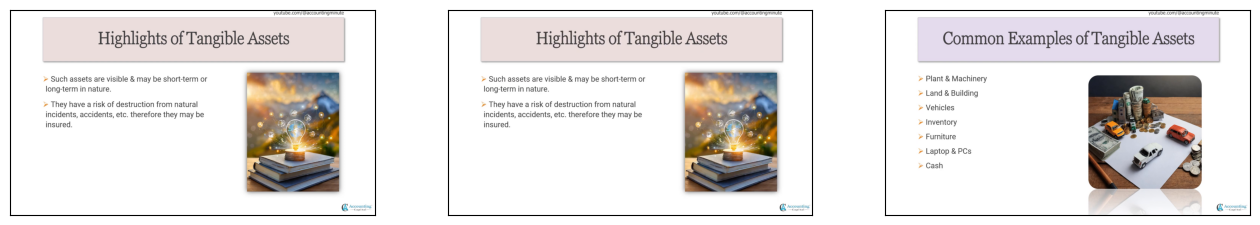

In [ ]:
plot_images(img)

In [ ]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge, \n"

    "--------------------\n"
    "Context:{context_str}\n"
    "Metadata for video:{metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer:"
)

In [ ]:
img

['/content/mixed_data/frame0009.png',
 '/content/mixed_data/frame0008.png',
 '/content/mixed_data/frame0013.png']

In [ ]:
import json
metadata_str=json.dumps(metadata_vid_yt_dlp)

In [ ]:
query_str="can you tell me what is tangible and tangible assets?"

In [ ]:
context_str = "".join(text)

In [ ]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [ ]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4o-mini",api_key=OPENAI_API_TOKEN,max_new_tokens=1500)

In [ ]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str,metadata_str=metadata_str,context_str=context_str
    ),
    image_documents=image_documents,
)

In [ ]:
pprint(result)

CompletionResponse(text='**Tangible** refers to something that can be felt by the sense of touch. \n\n**Tangible assets** are assets that have a physical existence and can be touched and felt. They are visible and can be classified as either short-term or long-term in nature. Examples of tangible assets include:\n\n- Plant and machinery\n- Land and buildings\n- Vehicles\n- Inventory\n- Furniture\n- Laptops and PCs\n- Cash\n\nThese assets carry a risk of destruction from natural incidents or accidents, and they can be stored and used as collateral.', additional_kwargs={}, raw=ChatCompletion(id='chatcmpl-AZHeMulperVYziUHIggZgymioY95a', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='**Tangible** refers to something that can be felt by the sense of touch. \n\n**Tangible assets** are assets that have a physical existence and can be touched and felt. They are visible and can be classified as either short-term or long-term in nature. Examp

In [ ]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge, \n"

    "--------------------\n"
    "Metadata for video:{metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer:"
)

In [ ]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,
)